In [1]:
import pandas as pd
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
LaCrimeDF = pd.read_csv("LaCrime2.csv")
LaWeatherDF = pd.read_csv("LaWeather.csv")

In [3]:
LaCrimeDF.head()
# Raw Crime table


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
LaWeatherDF.head()
# Raw Weather Table

,Station,Date,Time,Interval,Air max,Air max time,Air min,Air min time,Air avg,RH avg,Precip,Chill hrs,Hrs 32F,Hrs 85F,Hrs 95F
0,20140101,2400,1440,67,14:50,27,05:14,42,76,0.00,15.2,6.9,0.0,0.00,NaN
1,20140102,2400,1440,66,14:07,29,06:01,44,75,0.00,14.3,3.3,0.0,0.00,NaN
2,20140103,2400,1440,63,14:23,29,05:37,43,79,0.00,15.4,3.2,0.0,0.00,NaN
3,20140104,2400,1440,66,15:04,29,05:17,44,76,0.00,14.0,3.4,0.0,0.00,NaN
4,20140105,2400,1440,68,15:17,28,07:01,44,78,0.00,14.1,3.3,0.0,0.00,NaN


In [5]:
# Clean crime columns
# del LaCrimeDF["AREA"]
del LaCrimeDF["AREA NAME"]
del LaCrimeDF["Rpt Dist No"]
del LaCrimeDF["Crm Cd 2"]
del LaCrimeDF["Crm Cd 3"]
del LaCrimeDF["Crm Cd 4"]
del LaCrimeDF["LOCATION"]
del LaCrimeDF["Cross Street"]
del LaCrimeDF["LAT"]
del LaCrimeDF["Status"]
del LaCrimeDF["Status Desc"]
del LaCrimeDF["LON"]
del LaCrimeDF["Weapon Desc"]
del LaCrimeDF["Weapon Used Cd"] 
del LaCrimeDF["Premis Desc"]
del LaCrimeDF["Vict Descent"]
del LaCrimeDF["Vict Sex"]
del LaCrimeDF["Vict Age"]
del LaCrimeDF["Date Rptd"]
del LaCrimeDF["Part 1-2"]
del LaCrimeDF["DR_NO"]
LaCrimeDF.head()

,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1
0,02/20/2010 12:00:00 AM,1350,13,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0
1,09/12/2010 12:00:00 AM,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0
2,08/09/2010 12:00:00 AM,1515,13,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0
3,01/05/2010 12:00:00 AM,150,6,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0
4,01/02/2010 12:00:00 AM,2100,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0


In [6]:
# Clean Weather columns
# del LaWeatherDF["Station"]
del LaWeatherDF["Time"]
del LaWeatherDF["Date"]
del LaWeatherDF["Air max"]
del LaWeatherDF["Air min"]
del LaWeatherDF["RH avg"]
del LaWeatherDF["Precip"]
del LaWeatherDF["Chill hrs"]
del LaWeatherDF["Hrs 32F"]
del LaWeatherDF["Hrs 85F"]
del LaWeatherDF["Hrs 95F"]
del LaWeatherDF["Air avg"]


In [7]:
LaWeatherDF.rename(columns={'Station': 'Date', 'Interval': 'Temp Max','Air max time': 'Temp Min', 'Air min time':'Temp Avg'}, inplace=True)
LaWeatherDF.head()

,Date,Temp Max,Temp Min,Temp Avg
0,20140101,67,27,42
1,20140102,66,29,44
2,20140103,63,29,43
3,20140104,66,29,44
4,20140105,68,28,44


In [8]:
LaCrimeDF["Date"] = pd.to_datetime(LaCrimeDF["DATE OCC"]).dt.date
del LaCrimeDF["DATE OCC"]


Manipulating the date for the weather data set to convert it to datetime format

In [9]:

year = []
month = []
day = []
for ind in LaWeatherDF.index:
    take = LaWeatherDF.loc[ ind,'Date']
    year.append(int(str(take)[:4]))
    month.append(int(str(take)[4:-2]))
    day.append(int(str(take)[6:]))
LaWeatherDF['Year'] = year
LaWeatherDF['Month'] = month
LaWeatherDF['Day'] = day
LaWeatherDF.head()        

,Date,Temp Max,Temp Min,Temp Avg,Year,Month,Day
0,20140101,67,27,42,2014,1,1
1,20140102,66,29,44,2014,1,2
2,20140103,63,29,43,2014,1,3
3,20140104,66,29,44,2014,1,4
4,20140105,68,28,44,2014,1,5


In [10]:
LaWeatherDF['DATE'] = LaWeatherDF['Year'].map(str) + '-' + LaWeatherDF['Month'].map(str) + '-' +  LaWeatherDF['Day'].map(str)
del LaWeatherDF['Date']
del LaWeatherDF['Year']
del LaWeatherDF['Month']
del LaWeatherDF['Day']
LaWeatherDF.head()

,Temp Max,Temp Min,Temp Avg,DATE
0,67,27,42,2014-1-1
1,66,29,44,2014-1-2
2,63,29,43,2014-1-3
3,66,29,44,2014-1-4
4,68,28,44,2014-1-5


In [11]:
LaWeatherDF["Date"] = pd.to_datetime(LaWeatherDF["DATE"]).dt.date

In [12]:

del LaWeatherDF['DATE']

In [13]:
LaCrimeDF["Report Month"] = pd.DatetimeIndex(LaCrimeDF["Date"]).month
LaCrimeDF["Report Year"] = pd.DatetimeIndex(LaCrimeDF["Date"]).year
LaCrimeDF["Report Day"] = pd.DatetimeIndex(LaCrimeDF["Date"]).day
LaWeatherDF["Report Month"] = pd.DatetimeIndex(LaWeatherDF["Date"]).month
LaWeatherDF["Report Year"] = pd.DatetimeIndex(LaWeatherDF["Date"]).year
LaWeatherDF["Report Day"] = pd.DatetimeIndex(LaWeatherDF["Date"]).day

Filtering out the years that dont overlap so I can merge

In [14]:
LaWeatherDF= LaWeatherDF[~(LaWeatherDF['Report Year'] > 2017)]


In [15]:
LaCrimeDF = LaCrimeDF[~(LaCrimeDF['Report Year'] < 2014)]

In [16]:
LaWeatherDF.rename(columns={'DATE': 'Date'}, inplace=True)

In [17]:
LaCrimeDF.dropna(inplace=True)
LaWeatherDF.dropna(inplace=True)

In [18]:
LaCrimeDF.head()


,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2
614216,1200,20,354,THEFT OF IDENTITY,0928 0930 1822 0100,501.0,354.0,2014-03-01,3,2014,1
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25,8,2014,25
614218,1300,2,354,THEFT OF IDENTITY,0100 0930 1822,218.0,354.0,2014-03-05,3,2014,5
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,1,2014,3


In [19]:
del LaWeatherDF["Report Month"] 
del LaWeatherDF["Report Year"]
del LaWeatherDF["Report Day"] 
LaCrimeDF.dropna(inplace=True)
LaWeatherDF.dropna(inplace=True)

In [20]:
LaMerged = pd.merge(LaCrimeDF, LaWeatherDF, how='outer', on = 'Date')


In [21]:
LaMerged["Temp Max"] = pd.to_numeric(LaMerged["Temp Max"], errors='coerce')

In [22]:
LaMerged.dropna(inplace=True)

In [23]:
CrimeCategory = LaMerged["Crm Cd Desc"].value_counts()
print(CrimeCategory)
LaMerged.head()

BATTERY - SIMPLE ASSAULT                    69833
BURGLARY FROM VEHICLE                       60153
THEFT PLAIN - PETTY ($950 & UNDER)          58340
BURGLARY                                    56093
THEFT OF IDENTITY                           50746
                                            ...  
TRAIN WRECKING                                  2
FIREARMS RESTRAINING ORDER (FIREARMS RO)        1
BOAT - STOLEN                                   1
ABORTION/ILLEGAL                                1
TILL TAP - ATTEMPT                              1
Name: Crm Cd Desc, Length: 139, dtype: int64


,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day,Temp Max,Temp Min,Temp Avg
0,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2,95.0,50,74
1,2000,7,664,"BUNCO, PETTY THEFT",0701 0344,502.0,664.0,2014-06-02,6,2014,2,95.0,50,74
2,2050,2,624,BATTERY - SIMPLE ASSAULT,2004 1266 0416,701.0,624.0,2014-06-02,6,2014,2,95.0,50,74
3,1200,12,440,THEFT PLAIN - PETTY ($950 & UNDER),0701 1820 0344,501.0,440.0,2014-06-02,6,2014,2,95.0,50,74
4,100,12,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1202,502.0,440.0,2014-06-02,6,2014,2,95.0,50,74


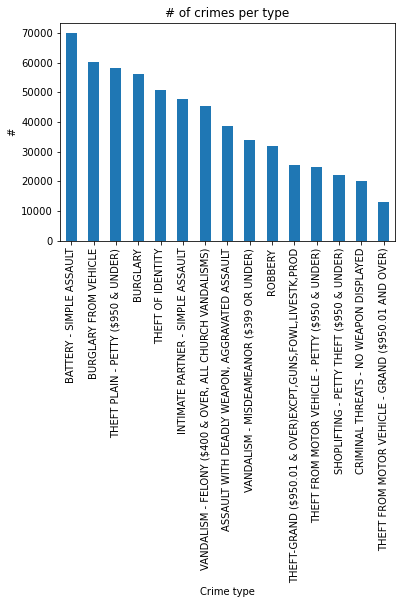

In [24]:
shw = LaMerged[-LaMerged['Crm Cd Desc'].isin(CrimeCategory[CrimeCategory < 13000].index)]
ax = (shw["Crm Cd Desc"].value_counts()).plot(title="# of crimes per type", kind = "bar")
ax.set_xlabel("Crime type")
ax.set_ylabel("#")
plt.xticks(rotation=90)
plt.show()

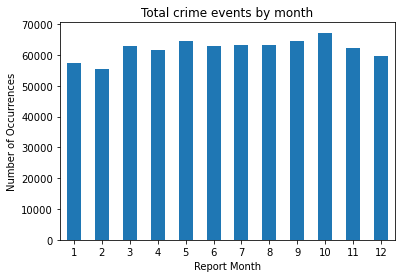

In [25]:
ax = LaMerged.groupby("Report Month").size().plot(kind = "bar", title= "Total crime events by month")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

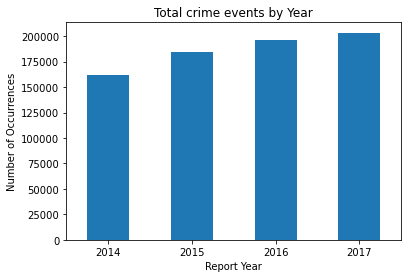

In [26]:
ax = LaMerged.groupby("Report Year").size().plot(kind = "bar", title= "Total crime events by Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

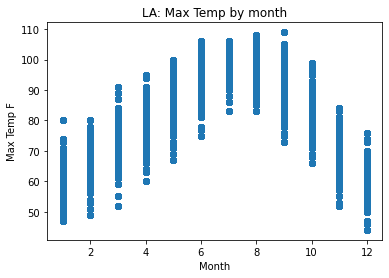

In [27]:
plt.scatter(LaMerged["Report Month"], LaMerged["Temp Max"])
plt.title("LA: Max Temp by month")
plt.xlabel('Month') 
plt.ylabel('Max Temp F')
plt.show()

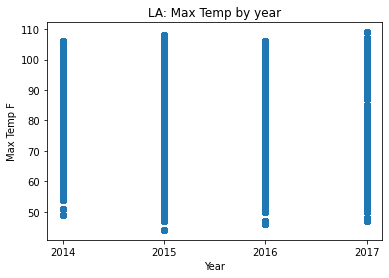

In [28]:
plt.scatter(LaMerged["Report Year"], LaMerged["Temp Max"])
plt.title("LA: Max Temp by year")
plt.xticks(np.arange(min(LaMerged["Report Year"]), max(LaMerged["Report Year"])+1, 1.0))
plt.xlabel('Year') 
plt.ylabel('Max Temp F')
plt.show()

In [29]:
LaWeatherDF.rename(columns={'DATE': 'Date'}, inplace=True)


In [30]:

LaCrimeDF.dropna(inplace=True)
LaWeatherDF.dropna(inplace=True)


In [31]:
numofcrimes = len(LaCrimeDF.index)
print("Total Crimes:", numofcrimes)

numofweather = len(LaWeatherDF.index)
print("Weather Entries:", numofweather)

Total Crimes: 1176536
Weather Entries: 1461


Merging Crime & Weather dataset

In [32]:
LaMerged.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day,Temp Max,Temp Min,Temp Avg
0,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2,95.0,50,74
1,2000,7,664,"BUNCO, PETTY THEFT",0701 0344,502.0,664.0,2014-06-02,6,2014,2,95.0,50,74
2,2050,2,624,BATTERY - SIMPLE ASSAULT,2004 1266 0416,701.0,624.0,2014-06-02,6,2014,2,95.0,50,74
3,1200,12,440,THEFT PLAIN - PETTY ($950 & UNDER),0701 1820 0344,501.0,440.0,2014-06-02,6,2014,2,95.0,50,74
4,100,12,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1202,502.0,440.0,2014-06-02,6,2014,2,95.0,50,74


In [33]:
LaMerged["Temp Avg"] = pd.to_numeric(LaMerged["Temp Avg"], errors='coerce')

In [34]:
LaMerged["Temp Max"] = pd.to_numeric(LaMerged["Temp Max"], errors='coerce')

Temp scope

In [35]:
LaMerged.dropna(inplace=True)
temp = LaMerged['Temp Max']
crimeType = LaMerged['Crm Cd'].unique()
Cold = LaMerged[LaMerged['Temp Max'] < 50.0]
Hot = LaMerged[LaMerged['Temp Max']  > 80.0]
Mild = LaMerged[(LaMerged['Temp Max'] >= 50.0) & (LaMerged['Temp Max']  <= 80.0)]
numofweathercrimes = len(LaMerged.index)


Counting the crimes when its hot

In [36]:
ldf = Hot



theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()
theft8 = ldf.loc[ldf['Crm Cd'] == 668].value_counts()
theft9 = ldf.loc[ldf['Crm Cd'] == 649].value_counts()
theft10 = ldf.loc[ldf['Crm Cd'] == 480].value_counts()
theft11 = ldf.loc[ldf['Crm Cd'] == 350].value_counts()
theft12 = ldf.loc[ldf['Crm Cd'] == 662].value_counts()

numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)


vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

numofvandalism = len(vandalism.index) + len(vandalism2.index)


robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
robbery2 = ldf.loc[ldf['Crm Cd'] == 220].value_counts()

numofrobbery = len(robbery.index) + len(robbery2.index)


burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()
burglary4 = ldf.loc[ldf['Crm Cd'] == 320].value_counts()

numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)

trespassing = ldf.loc[ldf['Crm Cd'] == 888].value_counts()
numoftrespassing = len(trespassing.index)

fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)

numcrimeproph = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap 

proppercent = str(round(((numcrimeproph/numofweathercrimes)*100), 2))

print("Crimes Against Property on Hot Days:", numcrimeproph)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)

print("trespassing:", numoftrespassing)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()


assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()
assault4 = ldf.loc[ldf['Crm Cd'] == 860].value_counts()
assault5 = ldf.loc[ldf['Crm Cd'] == 236].value_counts()

numofassault = len(assault.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)

# homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
# numofhomicide = len(homicide.index)

# kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
# numofkidnap = len(kidnap.index)

# stalking = ldf.loc[ldf['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = ldf.loc[ldf['Crm Cd'] == 956].value_counts()
numofstalking =  len(stalk2.index)



medical = ldf.loc[ldf['Crm Cd'] == 627].value_counts()
numofmedical = len(medical.index)

# person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
# numofperson = len(person.index)

harassment = ldf.loc[ldf['Crm Cd'] == 121].value_counts()
numofharass = len(harassment.index)

numcrimepersonh = numofassault + numofmedical + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonh/numofweathercrimes)*100), 2))

print("Crimes Against People on Hot Days:", numcrimepersonh)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
# print("homicide Crimes:", numofhomicide)
# print("kidnap Crimes:", numofkidnap)

print("stalking:", numofstalking)
print("Child:", numofmedical)
# print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()

Violations =  ldf.loc[ldf['Crm Cd'] == 900].value_counts()
Violations2 =  ldf.loc[ldf['Crm Cd'] == 901].value_counts()
numofvio = len(Violations.index) + len(Violations2.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
threat2 = ldf.loc[ldf['Crm Cd'] == 761].value_counts()

numofthreat = len(threat.index) + len(threat2.index)

# dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
# numofdsp = len(dsp.index)

other2 = ldf.loc[ldf['Crm Cd'] == 946].value_counts()
numofother =  len(other2.index)

numcrimesocietyh = numofvio + numofthreat + numofother 

societypercent = str(round(((numcrimesocietyh/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Hot Days:", numcrimesocietyh)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
# print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

hotdaycrimetot = numcrimeproph + numcrimepersonh + numcrimesocietyh

print("Total Hot Day Crimes:", hotdaycrimetot) 



print("Percent of Weather Crimes:", (str(round((hotdaycrimetot/len(LaMerged.index))*100,2))))

Crimes Against Property on Hot Days: 225475
Percent of Crimes: 30.26
Theft Crimes: 106425
Vandalism Crimes: 38823
Robbery Crimes: 17822
trespassing: 3673
Burglary Crimes: 56813
arson Crimes: 509
Weapon Possesion Crimes: 28
Fire Related Crimes: 1382

Crimes Against People on Hot Days: 90470
Percent of Crimes: 12.14
Assault Crimes: 83554
stalking: 3060
Child: 1555
Rape Crimes: 2301

Crimes Against Society/Other on Hot Days: 22811
Percent of Crimes: 3.06
Violations: 6739
Threats: 13035
Other: 3037

Total Hot Day Crimes: 338756
Percent of Weather Crimes: 45.46


Counting the crimes when its mild

In [37]:
ldf = Mild



theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()
theft8 = ldf.loc[ldf['Crm Cd'] == 668].value_counts()
theft9 = ldf.loc[ldf['Crm Cd'] == 649].value_counts()
theft10 = ldf.loc[ldf['Crm Cd'] == 480].value_counts()
theft11 = ldf.loc[ldf['Crm Cd'] == 350].value_counts()
theft12 = ldf.loc[ldf['Crm Cd'] == 662].value_counts()

numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)


vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

numofvandalism = len(vandalism.index) + len(vandalism2.index)
robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
robbery2 = ldf.loc[ldf['Crm Cd'] == 220].value_counts()

numofrobbery = len(robbery.index) + len(robbery2.index)


burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()
burglary4 = ldf.loc[ldf['Crm Cd'] == 320].value_counts()

numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)

trespassing = ldf.loc[ldf['Crm Cd'] == 888].value_counts()
numoftrespassing = len(trespassing.index)


fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)


numcrimepropm = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap 

proppercent = str(round(((numcrimepropm/numofweathercrimes)*100), 2))

print("Crimes Against Property on Mild Days:", numcrimepropm)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)
print("trespassing:", numoftrespassing)

print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()


assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()
assault4 = ldf.loc[ldf['Crm Cd'] == 860].value_counts()
assault5 = ldf.loc[ldf['Crm Cd'] == 236].value_counts()

numofassault = len(assault.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)

# homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
# numofhomicide = len(homicide.index)

# kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
# numofkidnap = len(kidnap.index)

# stalking = ldf.loc[ldf['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = ldf.loc[ldf['Crm Cd'] == 956].value_counts()
numofstalking = len(stalk2.index)



medical = ldf.loc[ldf['Crm Cd'] == 627].value_counts()
numofmedical = len(medical.index)

# person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
# numofperson = len(person.index)

harassment =  ldf.loc[ldf['Crm Cd'] == 121].value_counts()
numofharass = len(harassment.index)

numcrimepersonm = numofassault +  numofmedical  + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonm/numofweathercrimes)*100), 2))

print("Crimes Against People on Mild Days:", numcrimepersonm)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
# print("homicide Crimes:", numofhomicide)
# print("kidnap Crimes:", numofkidnap)
print("stalking:", numofstalking)
print("Child:", numofmedical)
# print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()


Violations =  ldf.loc[ldf['Crm Cd'] == 900].value_counts()
Violations2 =  ldf.loc[ldf['Crm Cd'] == 901].value_counts()
numofvio = len(Violations.index) + len(Violations2.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
threat2 = ldf.loc[ldf['Crm Cd'] == 761].value_counts()

numofthreat = len(threat.index) + len(threat2.index)

# dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
# numofdsp = len(dsp.index)

other2 = ldf.loc[ldf['Crm Cd'] == 946].value_counts()
numofother =  len(other2.index)


numcrimesocietym = numofvio + numofthreat + numofother + numofthreat

societypercent = str(round(((numcrimesocietym/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Mild Days:", numcrimesocietym)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
# print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

milddaycrimetot = numcrimepropm + numcrimepersonm + numcrimesocietym

print("Total Mild Day Crimes:", milddaycrimetot)
print("Percent of Weather Crimes:", (str(round((milddaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Mild Days: 238276
Percent of Crimes: 31.97
Theft Crimes: 112378
Vandalism Crimes: 39221
Robbery Crimes: 18191
trespassing: 3744
Burglary Crimes: 62823
arson Crimes: 490
Weapon Possesion Crimes: 32
Fire Related Crimes: 1397

Crimes Against People on Mild Days: 86780
Percent of Crimes: 11.65
Assault Crimes: 79755
stalking: 3170
Child: 1634
Rape Crimes: 2221

Crimes Against Society/Other on Mild Days: 34829
Percent of Crimes: 4.67
Violations: 6650
Threats: 12554
Other: 3071

Total Mild Day Crimes: 359885
Percent of Weather Crimes: 48.29


Counting the crimes when its cold

In [38]:
ldf = Cold




theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()
theft8 = ldf.loc[ldf['Crm Cd'] == 668].value_counts()
theft9 = ldf.loc[ldf['Crm Cd'] == 649].value_counts()
theft10 = ldf.loc[ldf['Crm Cd'] == 480].value_counts()
theft11 = ldf.loc[ldf['Crm Cd'] == 350].value_counts()
theft12 = ldf.loc[ldf['Crm Cd'] == 662].value_counts()

numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)

vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

numofvandalism = len(vandalism.index) + len(vandalism2.index)

trespassing = ldf.loc[ldf['Crm Cd'] == 888].value_counts()
numoftrespassing = len(trespassing.index)

robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
robbery2 = ldf.loc[ldf['Crm Cd'] == 220].value_counts()

numofrobbery = len(robbery.index) + len(robbery2.index)


burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()
burglary4 = ldf.loc[ldf['Crm Cd'] == 320].value_counts()

numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)

fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)

numcrimepropc = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap 

proppercent = str(round(((numcrimepropc/numofweathercrimes)*100), 2))

print("Crimes Against Property on Cold Days:", numcrimepropc)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)

print("trespassing:", numoftrespassing)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()

assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()
assault4 = ldf.loc[ldf['Crm Cd'] == 860].value_counts()
assault5 = ldf.loc[ldf['Crm Cd'] == 236].value_counts()

numofassault = len(assault.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)

# homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
# numofhomicide = len(homicide.index)

# kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
# numofkidnap = len(kidnap.index)

# stalking = ldf.loc[ldf['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = ldf.loc[ldf['Crm Cd'] == 956].value_counts()
numofstalking = len(stalk2.index)

medical = ldf.loc[ldf['Crm Cd'] == 627].value_counts()
numofmedical = len(medical.index)

# person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
# numofperson = len(person.index)

harassment =  ldf.loc[ldf['Crm Cd'] == 121].value_counts()
numofharass = len(harassment.index)

numcrimepersonc = numofassault   + numofmedical  + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonc/numofweathercrimes)*100), 2))

print("Crimes Against People on Cold Days:", numcrimepersonc)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
# print("homicide Crimes:", numofhomicide)
# print("kidnap Crimes:", numofkidnap)
print("stalking:", numofstalking)

print("Child:", numofmedical)
# print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()


Violations =  ldf.loc[ldf['Crm Cd'] == 900].value_counts()
Violations2 =  ldf.loc[ldf['Crm Cd'] == 901].value_counts()
numofvio = len(Violations.index) + len(Violations2.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
threat2 = ldf.loc[ldf['Crm Cd'] == 761].value_counts()

numofthreat = len(threat.index) + len(threat2.index)

# dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
# numofdsp = len(dsp.index)

# other = ldf.loc[ldf['Crm Cd Desc'].str.contains("other", case=False)]
other2 = ldf.loc[ldf['Crm Cd'] == 946].value_counts()
numofother =  len(other2.index)

numcrimesocietyc = numofvio + numofthreat + numofother 

societypercent = str(round(((numcrimesocietyc/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Cold Days:", numcrimesocietyc)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
# print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()


colddaycrimetot = numcrimepropc + numcrimepersonc + numcrimesocietyc

print("Total Cold Day Crimes:", colddaycrimetot)

print("Percent of Weather Crimes:", (str(round((colddaycrimetot/numofweathercrimes)*100,2))))
print(numofweathercrimes)

Crimes Against Property on Cold Days: 4202
Percent of Crimes: 0.56
Theft Crimes: 1865
Vandalism Crimes: 741
Robbery Crimes: 334
trespassing: 49
Burglary Crimes: 1171
arson Crimes: 10
Weapon Possesion Crimes: 0
Fire Related Crimes: 32

Crimes Against People on Cold Days: 1488
Percent of Crimes: 0.2
Assault Crimes: 1364
stalking: 68
Child: 22
Rape Crimes: 34

Crimes Against Society/Other on Cold Days: 364
Percent of Crimes: 0.05
Violations: 133
Threats: 203
Other: 28

Total Cold Day Crimes: 6054
Percent of Weather Crimes: 0.81
745211


Counting the total crimes against property

In [39]:

fire1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire1 = len(fire1.index)
theft1 = LaMerged.loc[LaMerged['Crm Cd'] == 440].value_counts()
theft2 = LaMerged.loc[LaMerged['Crm Cd'] == 354].value_counts()
theft3 = LaMerged.loc[LaMerged['Crm Cd'] == 420].value_counts()
theft4 = LaMerged.loc[LaMerged['Crm Cd'] == 341].value_counts()
theft5 = LaMerged.loc[LaMerged['Crm Cd'] == 442].value_counts()
theft6 = LaMerged.loc[LaMerged['Crm Cd'] == 520].value_counts()
theft7 = LaMerged.loc[LaMerged['Crm Cd'] == 331].value_counts()
theft8 = LaMerged.loc[LaMerged['Crm Cd'] == 668].value_counts()
theft9 = LaMerged.loc[LaMerged['Crm Cd'] == 649].value_counts()
theft10 = LaMerged.loc[LaMerged['Crm Cd'] == 480].value_counts()
theft11 = LaMerged.loc[LaMerged['Crm Cd'] == 350].value_counts()
theft12 = LaMerged.loc[LaMerged['Crm Cd'] == 662].value_counts()

numoftheft1 = len(theft1.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)

vandalism1 = LaMerged.loc[LaMerged['Crm Cd'] == 740].value_counts()
vandalism2 = LaMerged.loc[LaMerged['Crm Cd'] == 745].value_counts()

numofvandalism1 = len(vandalism1.index) + len(vandalism2.index)

trespassing1 = LaMerged.loc[LaMerged['Crm Cd'] == 888].value_counts()
numoftrespassing1 = len(trespassing1.index)

robbery1 = LaMerged.loc[LaMerged['Crm Cd'] == 210].value_counts()
robbery2 = LaMerged.loc[LaMerged['Crm Cd'] == 220].value_counts()

numofrobbery1 = len(robbery1.index) + len(robbery2.index)


burglaryz = LaMerged.loc[LaMerged['Crm Cd'] == 330].value_counts()
burglary2 = LaMerged.loc[LaMerged['Crm Cd'] == 510].value_counts()
burglary3 = LaMerged.loc[LaMerged['Crm Cd'] == 310].value_counts()
burglary4 = LaMerged.loc[LaMerged['Crm Cd'] == 320].value_counts()

numofburglary1 = len(burglaryz.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = LaMerged.loc[LaMerged['Crm Cd'] == 648].value_counts()
numofarson1 = len(arson.index)

weap = LaMerged.loc[LaMerged['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)

numcrimeprop = numofburglary1 + numofrobbery1 + numoftheft1 + numofarson1 + numofvandalism1 + numoffire1 + numoftrespassing1

proppercent1 = (numcrimeprop/numofweathercrimes)


print("Percent of Crimes:", proppercent1 * 100)
print("Theft Crimes:", numoftheft1)
print("Vandalism Crimes:", numofvandalism1)
print("Robbery Crimes:", numofrobbery1)
print("trespassing:", numoftrespassing1)
print("Burglary Crimes:", numofburglary1)
print("arson Crimes:", numofarson1)

print("Fire Related Crimes:", numoffire1)
print("Total",numcrimeprop)

Percent of Crimes: 62.78664700333194
Theft Crimes: 220668
Vandalism Crimes: 78785
Robbery Crimes: 36347
trespassing: 7466
Burglary Crimes: 120807
arson Crimes: 1009
Fire Related Crimes: 2811
Total 467893


Counting the total crimes against people

In [40]:

assaultz = LaMerged.loc[LaMerged['Crm Cd'] == 624].value_counts()
assault2 = LaMerged.loc[LaMerged['Crm Cd'] == 626].value_counts()
assault3 = LaMerged.loc[LaMerged['Crm Cd'] == 230].value_counts()
assault4 = LaMerged.loc[LaMerged['Crm Cd'] == 860].value_counts()
assault5 = LaMerged.loc[LaMerged['Crm Cd'] == 236].value_counts()

numofassault1 = len(assaultz.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)
# homicide1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("homicide", case=False)]
# numofhomicide1 = len(homicide1.index)

# kidnap1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("kidnap", case=False)]
# numofkidnap1 = len(kidnap1.index)

# stalking1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = LaMerged.loc[LaMerged['Crm Cd'] == 956].value_counts()
numofstalking1 = len(stalk2.index)


medical1 = LaMerged.loc[LaMerged['Crm Cd'] == 627].value_counts()
numofmedical1 = len(medical1.index)

# person1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("person", case=False)]
# numofperson1 = len(person1.index)

harassment1 =  LaMerged.loc[LaMerged['Crm Cd'] == 121].value_counts()
numofharass1 = len(harassment1.index)


numcrimeperson = numofassault1 + numofmedical1  + numofharass1 + numofstalking1 

peoplepercent1 = (numcrimeperson/numofweathercrimes)

print("Percent of Crimes:", peoplepercent1*100)
print("Assault Crimes:", numofassault1)
# print("homicide Crimes:", numofhomicide1)
# print("kidnap Crimes:", numofkidnap1)
print("stalking:", numofstalking1)

print("Child:", numofmedical1)
# print("Person Crimes:", numofperson1)
print("Rape Crimes:", numofharass1)
print("Total", numcrimeperson)


Percent of Crimes: 23.984884817856955
Assault Crimes: 164673
stalking: 6298
Child: 3211
Rape Crimes: 4556
Total 178738


Counting the total crimes against society 

In [41]:
Violations1 = LaMerged.loc[LaMerged['Crm Cd'] == 900].value_counts()
Violations2 =  LaMerged.loc[LaMerged['Crm Cd'] == 901].value_counts()
numofvio1 = len(Violations1.index) + len(Violations2.index)

threat1 = LaMerged.loc[LaMerged['Crm Cd'] == 930].value_counts()
threat2 = LaMerged.loc[LaMerged['Crm Cd'] == 761].value_counts()

numofthreat1 = len(threat1.index) + len(threat2.index)

# dsp1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
# numofdsp1 = len(dsp1.index)

# other1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("other", case=False)]
other2 = LaMerged.loc[LaMerged['Crm Cd'] == 946].value_counts()
numofother1 =  len(other2.index)

numcrimesociety = numofvio1 + numofother1 + numofthreat1

societypercent1 = (numcrimesociety/numofweathercrimes)


print("Percent of Crimes:", societypercent1*100)
print("Violations:", numofvio1)
# print("DISTURBING THE PEACE:", numofdsp1)
print("Threats:", numofthreat1)
print("Other:", numofother1)
print("Total", numcrimesociety)


Percent of Crimes: 6.098943789074504
Violations: 13522
Threats: 25792
Other: 6136
Total 45450


In [42]:

numofmissing1 = numofweathercrimes - (numcrimeprop + numcrimeperson + numcrimesociety)

print("Number of crime on property:", numcrimeprop)
print("Number of crime on people:", numcrimeperson)
print("Number of crime on society:", numcrimesociety)
print("Number Missing:", numofmissing1)
missingpercent = (numofmissing1/len(LaMerged.index))
print("Percent of Crimes Missing:", missingpercent*100)

Number of crime on property: 467893
Number of crime on people: 178738
Number of crime on society: 45450
Number Missing: 53130
Percent of Crimes Missing: 7.1295243897365985


In [43]:
totweatherprop = numcrimeproph + numcrimepropm + numcrimepropc
totweatherperson = numcrimepersonh + numcrimepersonm + numcrimepersonc
totweathersociety = numcrimesocietyh + numcrimesocietym + numcrimesocietyc

hotProb = hotdaycrimetot/numofweathercrimes
mildProb = milddaycrimetot/numofweathercrimes
coldProb = colddaycrimetot/numofweathercrimes

propProb = numcrimeprop/numofweathercrimes
peopleProb = numcrimeperson/numofweathercrimes
societyProb = numcrimesociety/numofweathercrimes


bayhprop = (numcrimeproph)/(hotdaycrimetot)
bayhpeople = (numcrimepersonh)/(hotdaycrimetot)
bayhsociety = (numcrimesocietyh)/(hotdaycrimetot)

baymprop = (numcrimepropm)/(milddaycrimetot)
baympeople = (numcrimepersonm)/(milddaycrimetot)
baymsociety = (numcrimesocietym)/(milddaycrimetot)

baycprop = (numcrimepropc)/(colddaycrimetot)
baycpeople = (numcrimepersonc)/(colddaycrimetot)
baycsociety = (numcrimesocietyc)/(colddaycrimetot)

#probhotprop = (()/())

print("Property Crimes: ", (str(round((totweatherprop/numofweathercrimes)*100,2))))
print("People Crimes: ", (str(round((totweatherperson/numofweathercrimes)*100,2))))
print("Society Crimes: ", (str(round((totweathersociety/numofweathercrimes)*100,2))))
print("Bayes' Theroem:")
print("Given a Hot Day, Probability of Property Crime Occurring: ", (str(round(bayhprop*100,2))))
print("Given a Hot Day, Probability of People Crime Occurring: ", (str(round(bayhpeople*100,2))))
print("Given a Hot Day, Probability of Society Crime Occurring: ", (str(round(bayhsociety*100,2))))
print("Given a Mild Day, Probability of Property Crime Occurring: ", (str(round(baymprop*100,2))))
print("Given a Mild Day, Probability of People Crime Occurring: ", (str(round(baympeople*100,2))))
print("Given a Mild Day, Probability of Society Crime Occurring: ", (str(round(baymsociety*100,2))))
print("Given a Cold Day, Probability of Property Crime Occurring: ", (str(round(baycprop*100,2))))
print("Given a Cold Day, Probability of People Crime Occurring: ", (str(round(baycpeople*100,2))))
print("Given a Cold Day, Probability of Society Crime Occurring: ", (str(round(baycsociety*100,2))))


Property Crimes:  62.79
People Crimes:  23.98
Society Crimes:  7.78
Bayes' Theroem:
Given a Hot Day, Probability of Property Crime Occurring:  66.56
Given a Hot Day, Probability of People Crime Occurring:  26.71
Given a Hot Day, Probability of Society Crime Occurring:  6.73
Given a Mild Day, Probability of Property Crime Occurring:  66.21
Given a Mild Day, Probability of People Crime Occurring:  24.11
Given a Mild Day, Probability of Society Crime Occurring:  9.68
Given a Cold Day, Probability of Property Crime Occurring:  69.41
Given a Cold Day, Probability of People Crime Occurring:  24.58
Given a Cold Day, Probability of Society Crime Occurring:  6.01
